In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("titaniumsv5").project("chandrayaan-2-ohrc-lunar-crater-dataset")
version = project.version(1)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uni

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chandrayaan-2-OHRC-Lunar-Crater-Dataset-1 in yolov8:: 100%|██████████| 49/49 [00:00<00:00, 4128.33it/s]


In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20

/content
100% 21.5M/21.5M [00:00<00:00, 96.1MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chandrayaan-2-OHRC-Lunar-Crater-Dataset-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [32]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp/800px-Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp.png' show_labels=False show_conf=false save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

Found https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp/800px-Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp.png locally at 800px-Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp.png
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/800px-Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp.png: 448x640 300 Craters, 97.8ms
Speed: 3.6ms preprocess, 97.8ms inference, 596.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [42]:
cd runs/detect/predict7

/content/runs/detect/predict7


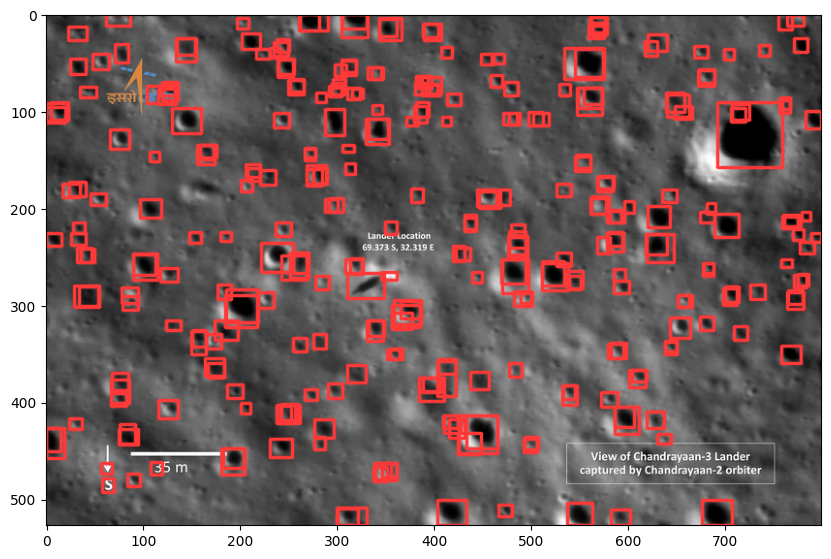

In [43]:
img = plt. imread('800px-Image_of_Chandrayaan-3_Lander_captured_by_OHRC_camera_aboard_Chandrayaan-2_Orbiter.webp.png')
plt.figure(figsize=(10, 8))
plt. imshow(img)
